## Exam II: CSCI4390-6390 (100 points)

This is a take-home exam. It is due 11:59:59pm on Thursday, Nov 3 via submitty. You are expected to abide by the honor code, i.e., all work must be your own, and you are not allowed to discuss any aspect of exam with anyone except the TA or the professor. You are also not allowed to use the internet except to lookup numpy/python documentation, the book site, class notes/videos, or to ask clarification questions on campuswire. **You cannot use any other library other than numpy (e.g., no pytorch, sklearn, etc); you can use pandas only for data processing**. You must sign the declaration below that you will abide by the honor code.

#### **Honor Code Declaration**: Please sign with your name to acknowledge that you agree to abide by the honor code, and demonstrate the highest level of academic integrity.

Pranjal Jain

#### Download Dataset: Download the [Seeds Dataset](https://archive.ics.uci.edu/ml/datasets/seeds). It has 9 attributes, and 210 points. The last attribute is the class variable. Store the dataset in your current directory and use "./seeds_dataset.txt" as its name. **DO NOT** submit the dataset as part of your answer on submitty.

In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./seeds_dataset.txt', sep="\t", header=None)

In [3]:
df.head

<bound method NDFrame.head of          0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..     ...    ...     ...    ...    ...    ...    ... ..
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[210 rows x 8 columns]>

#### Q1. Linear Regression: (Total 25 points)  For this question, we will use the first attribute as the target, and you will ignore the last attribute, which is the class. We will use linear regression to predict the target via the geometric approach. Answer the following:

##### a) (10 points) First find and print the orthogonal basis vectors (without unit normalization) for the independent attributes; print the first three and last three values of each basis vector. You cannot call numpy QR or simialr function for this.

##### b) (5 points) Next find and print the predicted vector, and show the squared error. You may not use numpy QR or similar function for this problem. 

##### c) (5 points) Find and print the regression coefficient or weight vector, using any method of choice. You can use the numpy inv function.

##### d) (5 points) Plot the scatter plot and regression line for the target versus the first attribute. Note: do not center the data, and do not run a separate regression for this. You must plot the effect of 1st attribute based on the full multivariate regression.

In [4]:
df1 = df[df.columns[0:7]]

In [5]:
X_train = df1[df1.columns[1:7]].to_numpy()
X_train = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)
Y = df1[0].to_numpy()

In [7]:
def orth_proj_uj(uj,ai):
    return (np.dot(uj,ai) / np.dot(ai,ai))

def sub_proj_qr(X):
    n, d = np.shape(X)
    Q = np.zeros((n, d))
    R = np.zeros((d, d))
    np.fill_diagonal(R, 1)
    #mat1 = np.zeros(mat.shape) 
    Q[:,0] = X[:,0]
    for i in range(1,d):
        ui = X[:,i]
        for j in range(i):
            R[j,i] = orth_proj_uj(X[:,i], Q[:,j])
            ui = ui - R[j,i] * Q[:,j]
        Q[:,i] = ui
    return(Q,R)

q,r = sub_proj_qr(X_train)
print(q)
for i in range(q.shape[1]):
    print('U',i,': ', q[:3,i],q[207:,i])


[[ 1.00000000e+00  2.80714286e-01 -2.68666067e-03 ... -2.16672272e-03
  -1.42209631e+00 -2.62296882e-01]
 [ 1.00000000e+00  1.07142857e-02  9.99882975e-03 ...  6.39689071e-03
  -2.56912585e+00 -2.41113780e-01]
 [ 1.00000000e+00 -4.69285714e-01  3.84952572e-02 ... -2.32061234e-02
  -1.96882473e-01 -1.18489995e-01]
 ...
 [ 1.00000000e+00 -8.99285714e-01  2.59128900e-02 ...  6.91857121e-02
   4.27131323e+00 -5.72193143e-02]
 [ 1.00000000e+00 -1.34928571e+00 -5.97795927e-03 ... -2.46484383e-02
  -3.53448753e-01  8.47947022e-02]
 [ 1.00000000e+00 -1.21928571e+00  9.07717498e-03 ...  4.88237671e-03
   1.79274780e+00  9.73647506e-03]]
U 0 :  [1. 1. 1.] [1. 1. 1.]
U 1 :  [ 0.28071429  0.01071429 -0.46928571] [-0.89928571 -1.34928571 -1.21928571]
U 2 :  [-0.00268666  0.00999883  0.03849526] [ 0.02591289 -0.00597796  0.00907717]
U 3 :  [ 0.03158919 -0.03985449 -0.03559144] [ 0.00318121 -0.03124122  0.05140863]
U 4 :  [-0.00216672  0.00639689 -0.02320612] [ 0.06918571 -0.02464844  0.00488238]
U 5

In [8]:
def norm(u):
    return np.sqrt(np.sum(u**2))

def orth_proj(uj,ai):
    return (np.dot(uj,ai) / (norm(uj)**2)) * uj

Y_pred =0
for i in range(0,q.shape[1]):
    Y_pred += orth_proj(q[:,i],Y)
print("predected values of Y: ", Y_pred)

sse = np.sum((Y-Y_pred)**2)
print("==============================================================")
print("SSE :", sse)

predected values of Y:  [15.32249901 14.89996759 14.28791616 13.94780753 16.15700819 14.40484421
 14.76543074 14.16696301 16.782528   16.49603943 15.3059898  14.0536285
 13.81955142 13.75706021 13.66834787 14.5542839  14.021522   15.68281446
 14.68396759 12.74707833 14.23216309 14.18689002 15.87207043 12.02138733
 14.98952462 16.15523911 12.97009388 12.67137881 14.13787683 13.50458976
 13.10086841 15.58175681 14.28181459 13.94157033 15.16892055 16.14661433
 16.35185121 17.09983594 14.88534304 14.34690054 13.59974955 13.5792973
 13.15054448 15.64392553 15.22425552 13.78678589 15.38746862 15.07214259
 14.83520526 14.97966148 14.54334067 15.78626949 14.61195593 14.37140563
 14.62416523 15.11996331 14.60852679 14.98451446 15.46079437 12.12299234
 11.2056282  11.02078936 12.22216733 13.27895274 12.69709675 12.79530394
 14.36875458 14.09220838 14.42272503 12.69873033 17.78098348 17.06997711
 17.40206237 19.05824456 16.93613321 16.93699068 17.40133794 20.43385037
 18.91725872 17.17786134 16.6

In [9]:
Q,R = sub_proj_qr(X_train) 
DI = np.diag(1/(np.apply_along_axis(np.linalg.norm, 0, Q)**2))
DQY = np.dot(DI, np.dot(Q.T, Y))

# w using inverse
w = np.dot(np.linalg.inv(R), DQY)
print("weights", w)

weights [-2.43833454e+01  1.79696033e+00  1.03270812e+01 -1.15968228e-01
  9.45077486e-01  5.24042440e-03  3.00891684e-01]


Text(0, 0.5, 'Y values')

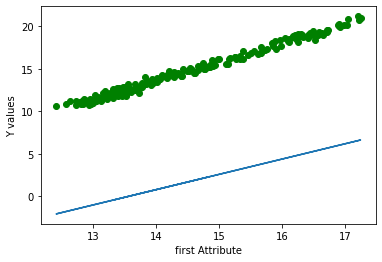

In [11]:
plt.scatter(X_train[:,1], Y,color='green')
b = w[0]

plt.plot(X_train[:,1], w[1]*X_train[:,1]+b)
plt.xlabel("first Attribute")
plt.ylabel("Y values")

#### Q2. Logistic Regression: (Total 25 points)  For this question use all attributes as independent, except for the last one, which will be used as the caterogical target or class variable for multiclass logistic regression. 

##### a) (15 points) Show the weight vector for each class after exactly 4 iterations of **batch** gradient descent. That is, you may not use stochastic gradient descent, but rather you should used the batch gradient computed over all points (given on top of page 633) for each class $j$. Initialize the weight matrix $W$ as follows: 

[[0.37454012, 0.95071431, 0.73199394],
   
[0.59865848, 0.15601864, 0.15599452],

[0.05808361, 0.86617615, 0.60111501],

[0.70807258, 0.02058449, 0.96990985],

[0.83244264, 0.21233911, 0.18182497],

[0.18340451, 0.30424224, 0.52475643],

[0.43194502, 0.29122914, 0.61185289],

[0.13949386, 0.29214465, 0.36636184]]

##### Where each column of $W$ gives the weight for the corresponding class. Use step size $\eta = 10^{-5}$. You may use scipy.special.softmax.

##### b) (5 points) Compute the cross entropy for the data after exactly 4 iterations.

##### c) (5 points) What is the log-odds ratio for class 1 versus class 3 for attribute 1 after 4 iterations?

In [55]:
wi = np.array([[0.37454012, 0.95071431, 0.73199394],

[0.59865848, 0.15601864, 0.15599452],

[0.05808361, 0.86617615, 0.60111501],

[0.70807258, 0.02058449, 0.96990985],

[0.83244264, 0.21233911, 0.18182497],

[0.18340451, 0.30424224, 0.52475643],

[0.43194502, 0.29122914, 0.61185289],

[0.13949386, 0.29214465, 0.36636184]]).reshape(3,8)

D = df.to_numpy()
X_train = D[:,:7]
n,d = X_train.shape
X_train = np.hstack((np.ones([n,1]),X_train))
Y_train = (pd.get_dummies(D[:,-1])).to_numpy()

In [93]:
from scipy.special import softmax

def MLR(X,Y,eta,ep,max_itr,weight):
    n,d = X.shape
    classes = Y.shape[1]
    t=0
    w = weight
    diff = 1
    while t<max_itr and diff>ep:
        wp = w.copy()
        ce = 0
        for i in np.random.permutation(n):
            pi = softmax(np.dot(w,X[i]))
            ce += np.sum(Y[i] * pi)
        for j in range(classes):
            w_j = (Y[i,j] - pi[j]) * X[i,:]
            w[j,:] = w[j,:] + eta * w_j
        t += 1
        diff = np.linalg.norm(w-wp)
    print("log odds : ", pi[0])
    print(t)
    return w,ce

In [94]:
wt,ce = MLR(X_train, Y_train, 1e-5, 1e-4, 4,wi)
print("weightvector :\n",pd.DataFrame(wt))
print("Cross entropy :\n",ce)

log odds :  0.9997674845900448
4
weightvector :
           0         1         2         3         4         5         6  \
0  0.374360  0.947970  0.729328  0.598503  0.154984  0.155407  0.057354   
1  0.601225  0.709982  0.022319  0.970006  0.833111  0.212727  0.182188   
2  0.304312  0.525591  0.432877  0.291288  0.612219  0.139693  0.292511   

          7  
0  0.865159  
1  0.184062  
2  0.366721  
Cross entropy :
 70.01417588025699


#### Q3. SVM: (Total 25 points) CSCI4390 must use linear kernel, and CSCI6390 must use quadratic homogeneous kernel with $c=0$ for this question. Find the $\mathbf{\alpha}$ values via the stochastic GD method for SVM training. Use the last attribute as the class variable, but with +1 denoting class 1, and -1 denoting the other two classes. Set the random seed to 42, and initilize $\mathbf{\alpha}$ randomly. Use $C=1$, convergence thrshold $\epsilon=0.001$ and maxiter=1000. Use hinge loss. Set step size as the inverse of the self-kernel value for each point. Answer the following questions:

##### a) (10 points) Print the $\mathbf{\alpha}$ vector. How many non-zero values does $\mathbf{\alpha}$ have. What do those signify?

##### b) (5 points) Find the weight vector $\mathbf{w}$ and the bias $b$.

##### c) (5 points) What is the signed distance of the point at index 70 in the data to the SVM hyperplane $h(\mathbf{x})=0$ (counting from 0). In what region does the point lie: within or outside the margin, and correctly or incorrectly classified.

##### d) (5 points) What is the effective margin of the hyperplane if we ignore incorrectly classified points. What would be the equation of the canonical hyperplane in this case.

In [95]:
D = df.to_numpy()
X = D[:,:7]
n,d = X.shape
Y = D[:,-1]
Y[Y<2] = int(1)
Y[Y>1] = int(-1)

In [131]:
np.random.seed(42)
def SVM(K,y,c,e,itr):
    one = np.ones(K.shape[0])
    K1 = np.insert(K, -1, one, axis=1)

    n = K.shape[0]
    nta = np.ones(n)*1e-5
    for i in range(n):
        nta[i] = 1/K1[i][i]
    t=0
    alpha = np.random.rand(n)
    while itr>=t:
        alphaold = alpha.copy()
        for k in range(n):

            alpha[k] = alpha[k] + nta[k]*(1 - y[k]*(np.dot(alpha * y, K[:,k])))
            if alpha[k]<0: 
                alpha[k]=0
            elif alpha[k]>c: 
                alpha[k]=c
        if np.linalg.norm(alpha - alphaold)<= e:
            break
        #alphaold = alpha
        t += 1
    print('t',t)
    return alpha

In [132]:
K = (np.dot(X, X.T))**2
aph = SVM(K, Y,1,0.001,1000) 


t 1001


In [133]:
print("non zero values in alpha: ",np.sum(aph !=0)," the non zero values signify the point which lie on the support vector or the margin")
print("alpha: ",aph)


non zero values in alpha:  40  the non zero values signify the point which lie on the support vector or the margin
alpha:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.44871394 0.         0.
 0.         0.52528658 0.         0.         0.         0.36953952
 0.46036402 1.         1.         1.         1.         1.
 1.         1.         0.92366294 0.         0.         0.
 1.         1.         1.         1.         0.         0.
 0.08029185 1.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [134]:
wsvm = np.dot(np.dot(aph,Y),X)

In [139]:
b = wsvm[:,-1]
wt_svm = wsvm[:,:-1]
print("bias :", b)
print("weight vector :",wsvm[:,:-1])

bias : [-1.28047407 -1.21571446 -1.18357996 -1.17867393 -1.2694355  -1.21571446
 -1.28022877 -1.22650773 -1.44163719 -1.35725345 -1.30353242 -1.22675303
 -1.16223872 -1.19510913 -1.18357996 -1.17278669 -1.17278669 -1.2377916
 -1.14040689 -1.2054118  -1.2696808  -1.28022877 -1.24883017 -1.21694097
 -1.22675303 -1.3018153  -1.18357996 -1.19437323 -1.23582919 -1.25030198
 -1.24024462 -1.28243648 -1.29985289 -1.22945135 -1.31481629 -1.33517631
 -1.35578164 -1.34523368 -1.30230591 -1.22675303 -1.27017141 -1.2696808
 -1.17327729 -1.35602695 -1.27066201 -1.21694097 -1.25888753 -1.2694355
 -1.2537362  -1.31260857 -1.26183115 -1.25986874 -1.32364714 -1.28145528
 -1.34596958 -1.33419511 -1.237301   -1.24809427 -1.28096467 -1.10851769
 -1.13010422 -1.15365317 -1.12961362 -1.24809427 -1.17303199 -1.13010422
 -1.26330296 -1.25888753 -1.30009819 -1.24294293 -1.48652737 -1.44163719
 -1.42054125 -1.4911881  -1.43280633 -1.42152246 -1.45267576 -1.58244027
 -1.56060844 -1.40950268 -1.44237309 -1.4421277

In [148]:
r = (np.dot(wsvm.T,X))/np.linalg.norm(wt_svm)

In [149]:
print("hyperplane is given by :",r)

array([[-148.04957545, -142.26329914,   -8.39220064,  -54.84620162,
         -31.98326414,  -34.89102311,  -52.73554747],
       [-142.26329914, -138.21423798,   -8.2133935 ,  -53.37056163,
         -30.98888893,  -34.57296349,  -51.30014828],
       [  -8.39220064,   -8.2133935 ,   -0.49109068,   -3.17366413,
          -1.84031393,   -2.07715692,   -3.04866932],
       [ -54.84620162,  -53.37056163,   -3.17366413,  -20.61908234,
         -11.95682442,  -13.39833868,  -19.82080174],
       [ -31.98326414,  -30.98888893,   -1.84031393,  -11.95682442,
          -6.96050925,   -7.7051419 ,  -11.48895331],
       [ -34.89102311,  -34.57296349,   -2.07715692,  -13.39833868,
          -7.7051419 ,  -10.31182264,  -12.93896893],
       [ -52.73554747,  -51.30014828,   -3.04866932,  -19.82080174,
         -11.48895331,  -12.93896893,  -19.07430926]])

In [154]:
dist = Y[69]*np.linalg.norm(np.dot(X[69,:],r))
print("distance of dist 70th point from hyperplane", dist)

distance of dist 70th point from hyperplane 7039.277495744218


The point is correctly classified because the distance is positive and the point is outside the margin

the margin of the hyperplan is 1 and the equation of the canonical hyperplane is 1/||W||

#### Q4. Neural Networks: (Total 25 points) Implement a one hidden layer MLP for the seeds dataset, where the target is the class variable. That is, you must use softmax activation for the output layer, with cross-entropy (CE) loss.  Use stochastic GD. Note that for the output layer, the net gradient $\mathbf{\delta}_o = \mathbf{o} - \mathbf{y}$ for softmax and CE loss (see eq. 25.52). However, for the hidden layer, the net gradient $\delta_h$ is the derivative of the ReLU function multiplied elementwise with $(\mathbf{W}_o \mathbf{\delta}_o)$.  Answer the following questions:

##### a) (15 points) Implement the MLP model with one hidden layer. Set the random seed to 42, and initialize the weight matrices and bias vectors randomly. For the hidden layer use $m=16$ neurons, with ReLU activation. Use $\eta=0.001$. Train for 200 iterations. Print the parameters of the model: $\mathbf{b}_h, \mathbf{W}_h, \mathbf{b}_o, \mathbf{W}_o$ after training.

##### b) (5 points) What is the cross-entropy and accuracy of your model.

##### c) (5 points) i) For the first point in the data (at index 0), what is the hidden layer value, and output vector (after model has been trained)? ii) What is the CE loss for the first point? iii) Print the net gradient vectors at the output and hidden layer for the first point.

In [155]:
D = df.to_numpy()
X = D[:,:7]
n,d = X.shape
Y = D[:,-1]

In [167]:
from scipy.special import softmax

n,d = X.shape
m=16

W_h = np.random.randn(d, m)
b_h = np.random.randn(m)
W_out = np.random.randn(m, 1)
b_out = np.random.randn(1)


def relu(x):
    return np.maximum(0, x)

def f_i(x):
    return relu(x)

def f_o(x):
    return softmax(x)

eta = 0.001

for i in range(200):
    # forward pass
    xi = X[i,:]
    net_zi = np.dot(xi, W_h) + b_h
    zi = f_i(net_zi)

    net_oi = np.dot(zi, W_out) + b_out
    oi = f_o(net_oi)

    # back propagation
    yi = Y[i]
    delta_o = (oi - yi) * oi * (1 - oi)
    delta_h = np.dot(delta_o, W_out.T) * zi * (1 - zi)

    W_out -= eta * np.outer(zi, delta_o)
    b_out -= eta * delta_o

    W_h -= eta * np.outer(xi, delta_h)
    b_h -= eta * delta_h

    # evaluate on validation set
    #net_z = np.dot(valid, W_h) + b_h
    #z = f_i(net_z)

    #net_o = np.dot(z, W_out) + b_out
    #o = f_o(net_o)

    # compute accuracy
    pred = np.where(oi > 0.5, 1, 0)
    acc = np.mean(pred == Y)
print('Accuracy: ', acc)
print("𝐛ℎ: ",b_h)
print("𝐖ℎ: ", W_h)
print("𝐛𝑜: ",b_out)
print("𝐖𝑜: ",W_out)
def cross_entropy_loss(yHat, y):
        if y[i] == 1:
          return -np.log(yHat)
        else:
          return -np.log(1 - yHat)
print("cross_entropy_loss: ", cross_entropy_loss(pred, Y))

Accuracy:  0.3333333333333333
𝐛ℎ:  [-0.22125362 -0.2768133   0.3074067   0.81573721  0.86047349 -0.58307744
 -0.16712171  0.28257995 -0.24869113  1.60734558  0.49097495  0.73487779
  0.66288127  1.17347386  0.18102156 -1.29683195]
𝐖ℎ:  [[-1.06511366 -0.3052247  -0.6095122  -0.1869713   0.05664992  0.52969275
  -0.07049878  0.48650164  0.06447441 -1.97546657 -0.93933539 -0.14408756
  -1.20969474  0.59992873  1.53075083  1.21876185]
 [-0.21344287  1.49072614  0.14866746 -0.33708597 -0.61340266 -0.30246969
  -0.38817682  0.17041622  0.16057398  0.00304602  0.43693817  1.19064627
   0.94955414 -1.48489797 -2.55392113  0.93431991]
 [-1.3668787  -0.2247654  -1.17011303 -1.80198044  0.54146273  0.75915516
  -0.5765104  -2.59104229 -0.54624445  0.39180401 -1.47891157  0.18335992
  -0.01530985  0.5792915   0.11958037 -0.97306894]
 [ 1.1965715  -0.15852957 -0.02730454 -0.93326796 -0.44328225 -0.88480271
  -0.17294606  1.71170848 -1.37190114 -1.6135614   1.47117033 -0.20932368
  -0.66907274  1.03

/var/folders/gb/hwvzzncj2f9fs4sfs8f7q2vh0000gn/T/ipykernel_44354/2614069309.py:62: RuntimeWarning: divide by zero encountered in log
  return -np.log(1 - yHat)


(1,)